# **Sistema de predicción temprana de obesidad.**


> Santiago Bolaños - 2201517


> Dilan Rey - 2190397





In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**LIBS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

**Lectura del dataset.**

In [ ]:
path = "/content/drive/MyDrive/ai_project/data/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(path)

**Describiendo el dataset**

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Head**

In [ ]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


**Exploración del dataset usando scatter**

Edad vs Altura

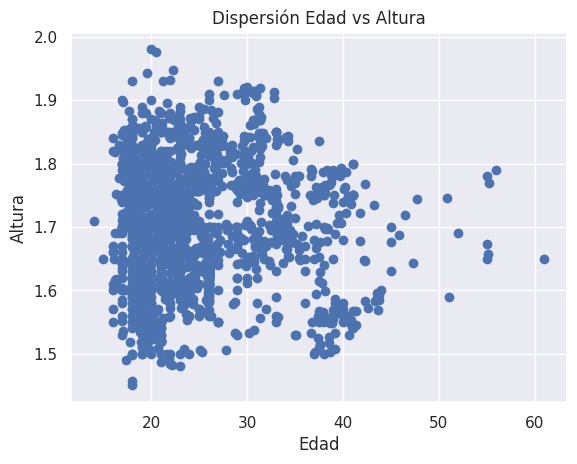

In [ ]:
plt.scatter(df['Age'], df['Height'])
plt.xlabel('Edad')
plt.ylabel('Altura')
plt.title('Dispersión Edad vs Altura')
plt.show()

Altura vs Peso

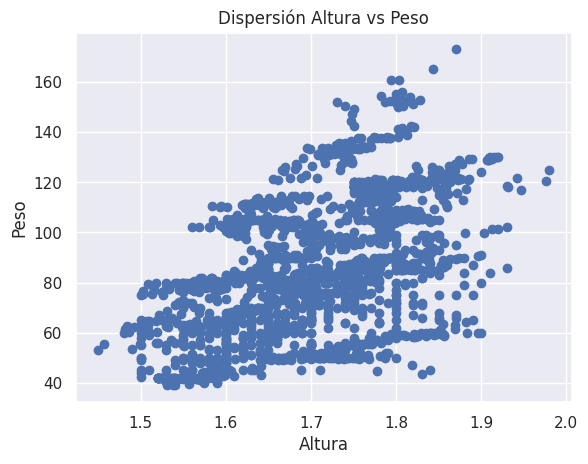

In [ ]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Dispersión Altura vs Peso')
plt.show()

Edad vs Consumo de agua diario

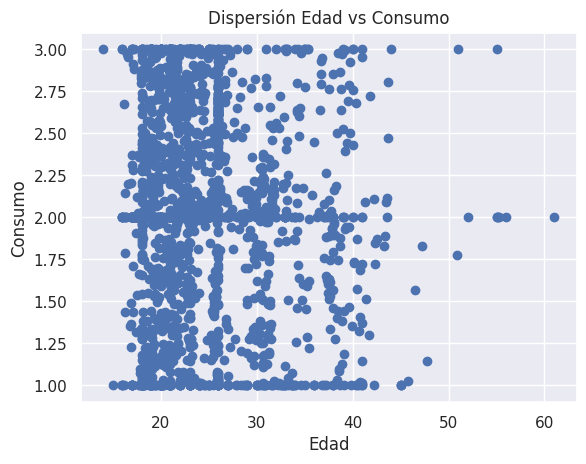

In [ ]:
plt.scatter(df['Age'], df['CH2O'])
plt.xlabel('Edad')
plt.ylabel('Consumo')
plt.title('Dispersión Edad vs Consumo')
plt.show()

**Hallando la matriz de correlacion**

In [ ]:
df.corr().round(2)

<ipython-input-37-1b12ae3e9d93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.00,-0.03,0.20,0.02,-0.04,-0.05,-0.14,-0.30
Height,-0.03,1.00,0.46,-0.04,0.24,0.21,0.29,0.05
Weight,0.20,0.46,1.00,0.22,0.11,0.20,-0.05,-0.07
FCVC,0.02,-0.04,0.22,1.00,0.04,0.07,0.02,-0.10
NCP,-0.04,0.24,0.11,0.04,1.00,0.06,0.13,0.04
CH2O,-0.05,0.21,0.20,0.07,0.06,1.00,0.17,0.01
FAF,-0.14,0.29,-0.05,0.02,0.13,0.17,1.00,0.06
TUE,-0.30,0.05,-0.07,-0.10,0.04,0.01,0.06,1.00


Graficando la matriz de correlacion

<ipython-input-38-aebbe490649f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, linewidth=.3)


Text(0.5, 1.0, 'Matriz de correlacion')

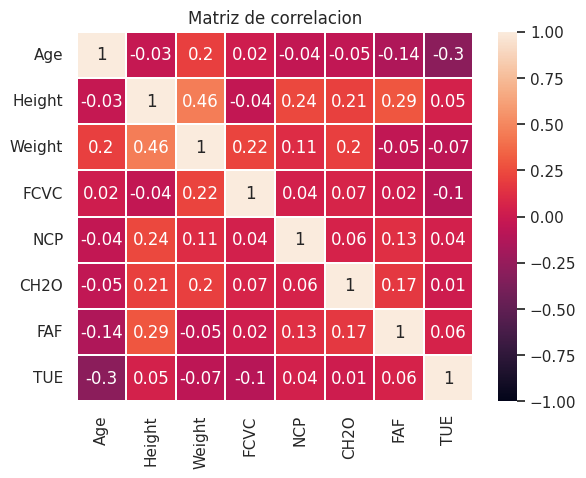

In [ ]:
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, linewidth=.3)
plt.title('Matriz de correlacion')

# **Segunda entrega**

Se realiza el mapeo de nuestros datos para tener sólo valores númericos en nuestro dataset.

In [ ]:
df["Gender"] = df.Gender.map({'Female': 0, 'Male': 1})
df["family_history_with_overweight"] = df.family_history_with_overweight.map({'no': 0, 'yes': 1})
df["FAVC"] = df.FAVC.map({'no': 0, 'yes': 1})
df["CAEC"] = df.CAEC.map({'no':0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df["SMOKE"] = df.SMOKE.map({'no': 0, 'yes': 1})
df["SCC"] = df.SCC.map({'no': 0, 'yes': 1})
df["CALC"] = df.CALC.map({'no':0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df["MTRANS"] = df.MTRANS.map({'Automobile':0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4})
df["NObeyesdad"] = df.NObeyesdad.map({'Insufficient_Weight':0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})

Generamos la matriz de correlación.

Text(0.5, 1.0, 'Matriz de correlacion')

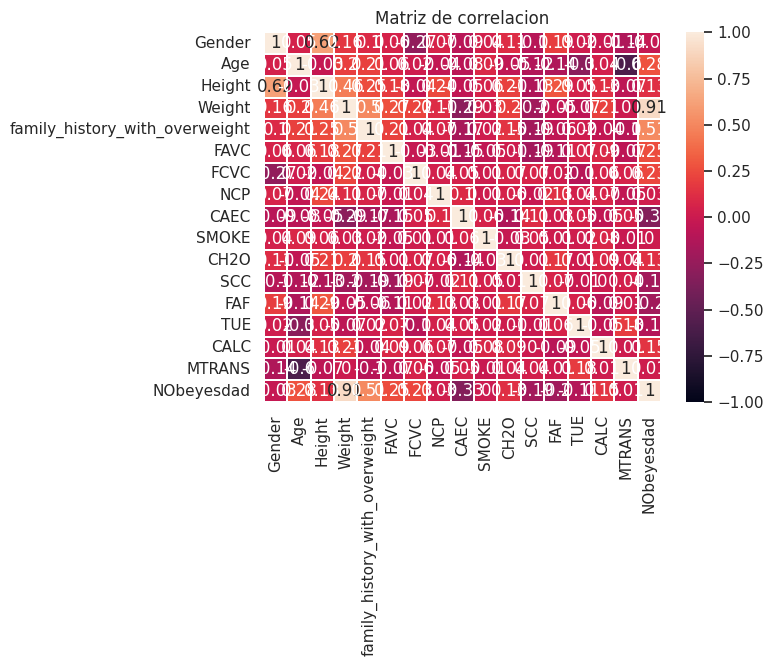

In [ ]:
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, linewidth=.1)
plt.title('Matriz de correlacion')

Se elimina la columna "Weight" debido a su alta correlación con "NObeyesdad"

In [ ]:
df = df.drop(columns=['Weight'])

In [ ]:
df.head(5)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,0,21.0,1.52,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,1,23.0,1.80,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,1,27.0,1.80,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,1,22.0,1.78,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


Definimos las columnas con las cuáles vamos a trabajar.

In [ ]:
X = df.values[:,:-1]
y = df.values[:,-1]

##Gaussian Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
est = GaussianNB()
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.5508274231678487


# **Decision Tree**

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las categorías en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.7777777777777778


**Tunning de Parámetros**

In [ ]:
max_depth = np.arange(1, 20)
criterion = np.array(['entropy', 'log_loss', 'gini'])

In [ ]:
accuracy_max_depth = []
accuracy_criterion = []

# Tunning de max_depth usando las opciones del np array max_depth
for j in max_depth:
  model = DecisionTreeClassifier(max_depth = j)
  model.fit(X_train,y_train)
  accuracy_max_depth.append(accuracy_score(model.predict(X_test), y_test))

# Tunning de criterion usando las opciones del np array criterion
for k in criterion:
  model = DecisionTreeClassifier(criterion = k)
  model.fit(X_train,y_train)
  accuracy_criterion.append(accuracy_score(model.predict(X_test), y_test))

**Graficando tunning de parámetros**

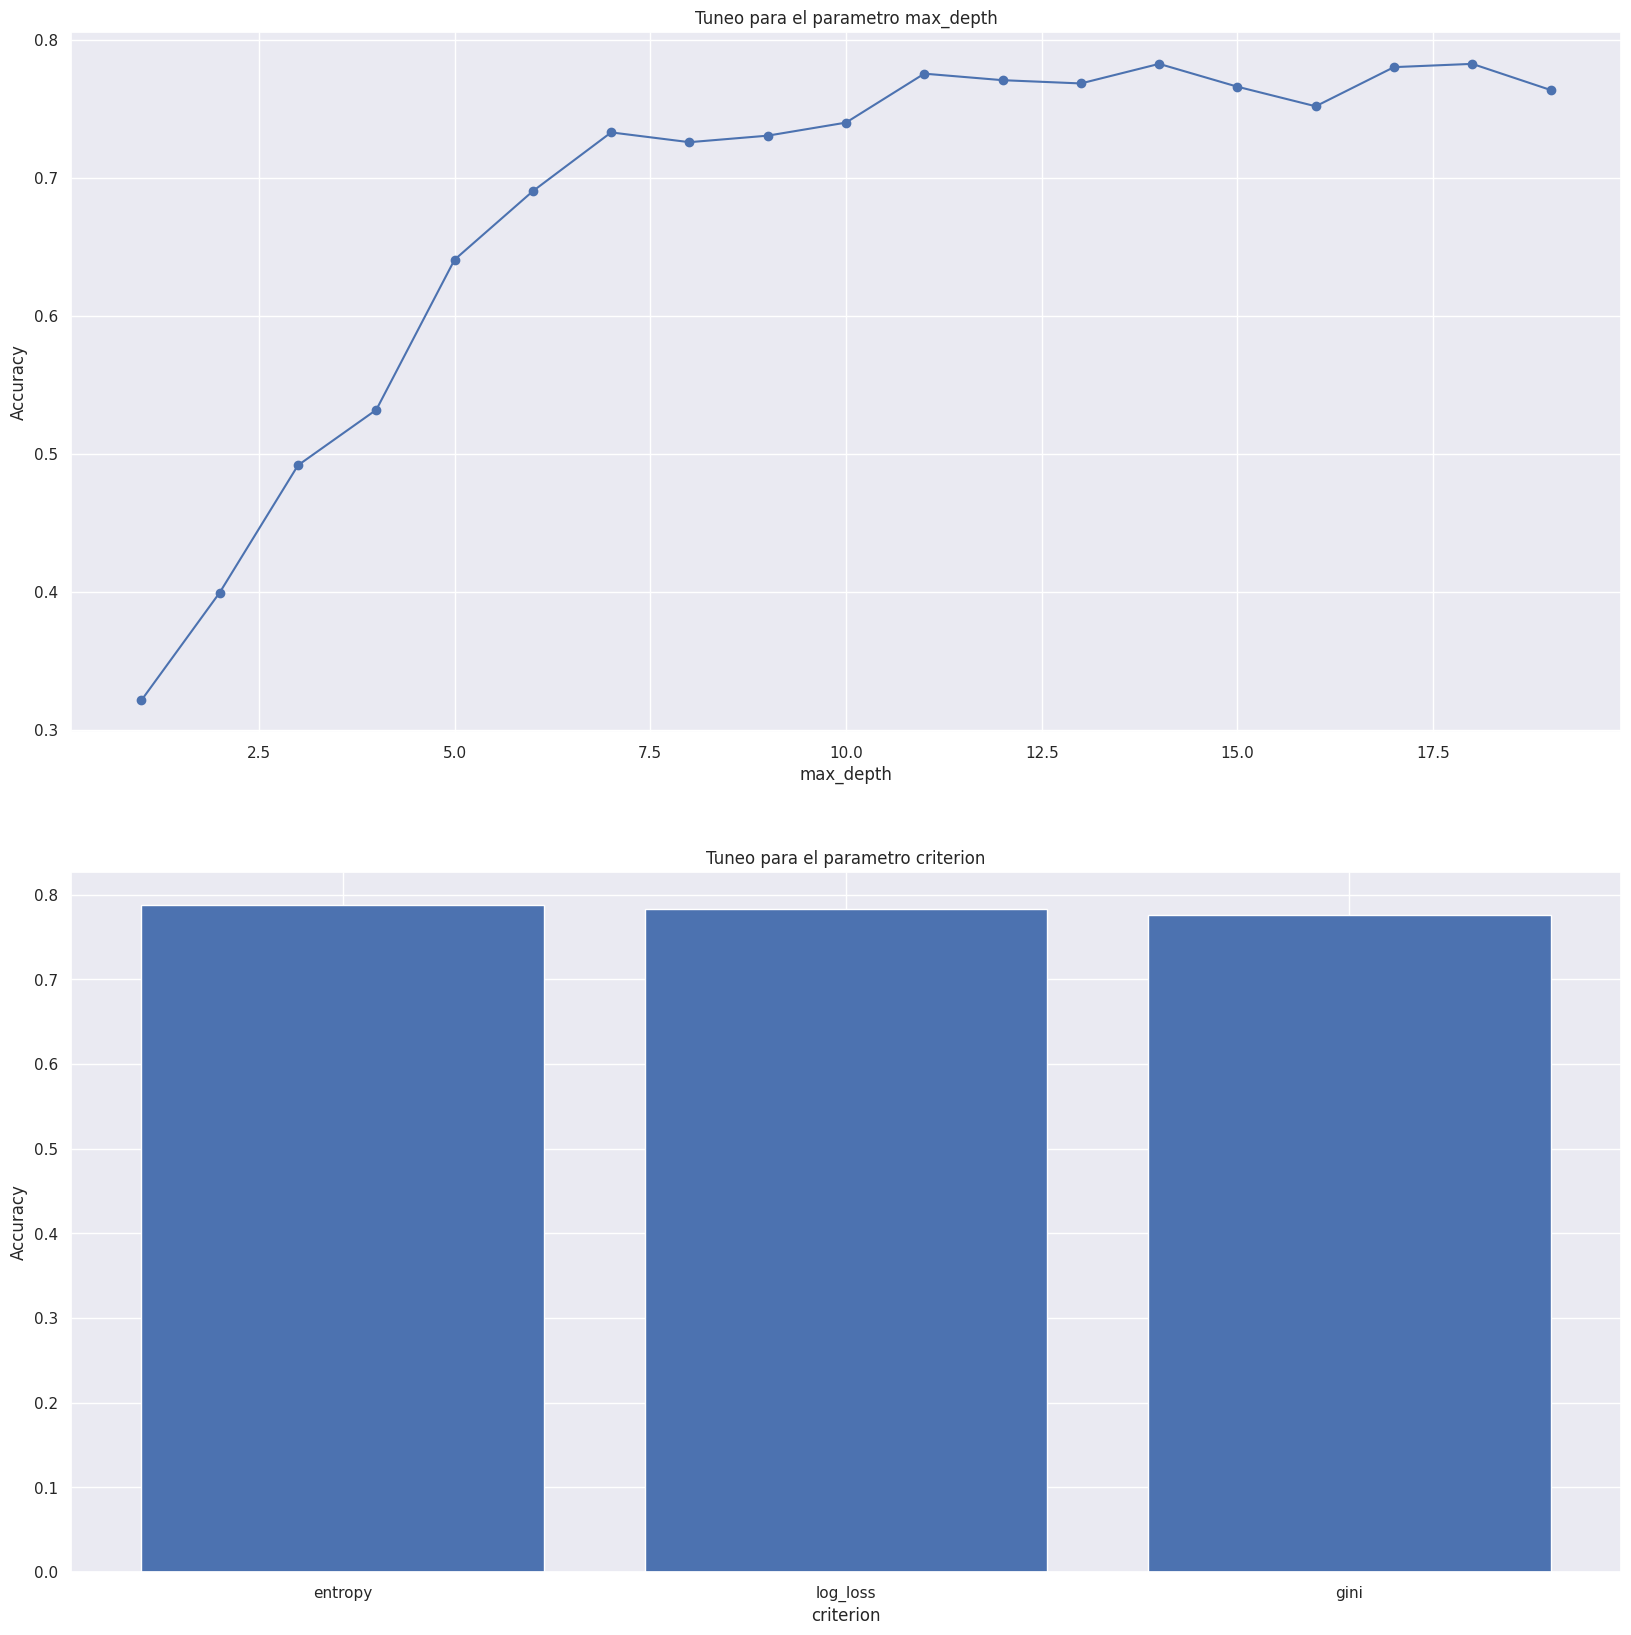

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

axes[0].set_title('Tuneo para el parametro max_depth')
axes[0].plot(max_depth, accuracy_max_depth, marker='o')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('Accuracy')
plt.grid(True)

axes[1].set_title('Tuneo para el parametro criterion')
axes[1].bar(criterion, accuracy_criterion)
axes[1].set_xlabel('criterion')
axes[1].set_ylabel('Accuracy')
plt.grid(True)
plt.show()

**Hallando los valores máximos**

In [ ]:
max_depth_value = np.argmax(accuracy_max_depth)
max_depth_value = max_depth[max_depth_value]
print('mejor max_depth: ', max_depth_value)

max_criterion = np.argmax(accuracy_criterion)
max_criterion = criterion[max_criterion]
print('valor de criterion para el accuracy maximo: ', max_criterion)

mejor max_depth:  14
valor de criterion para el accuracy maximo:  entropy


**Entrenando con los valores maximos y train test split 80/20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth = max_depth_value, criterion=max_criterion)
model.fit(X_train, y_train)
print('accuracy:', accuracy_score(model.predict(X_test), y_test))

accuracy: 0.789598108747045


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

s = cross_val_score(model, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy de cross validation 0.787 (+/- 0.02955)


**Train test split tunning**

In [ ]:
test_sizes = np.arange(.05, .4, step=0.05)
accuracy_test_sizes = []
for i in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=21)
  est = DecisionTreeClassifier(max_depth = max_depth_value, criterion=max_criterion)
  est.fit(X_train,y_train)
  accuracy_test_sizes.append(accuracy_score(est.predict(X_test), y_test))

**Cross validation tunning**

In [ ]:
opts = np.arange(5, 15, step=1)
accuracy_opts = []
for j in opts:
  s = cross_val_score(model, X, y, cv=KFold(j, shuffle=True), scoring=make_scorer(accuracy_score))
  accuracy_opts.append(np.mean(s))

**Graficando Tunnings**

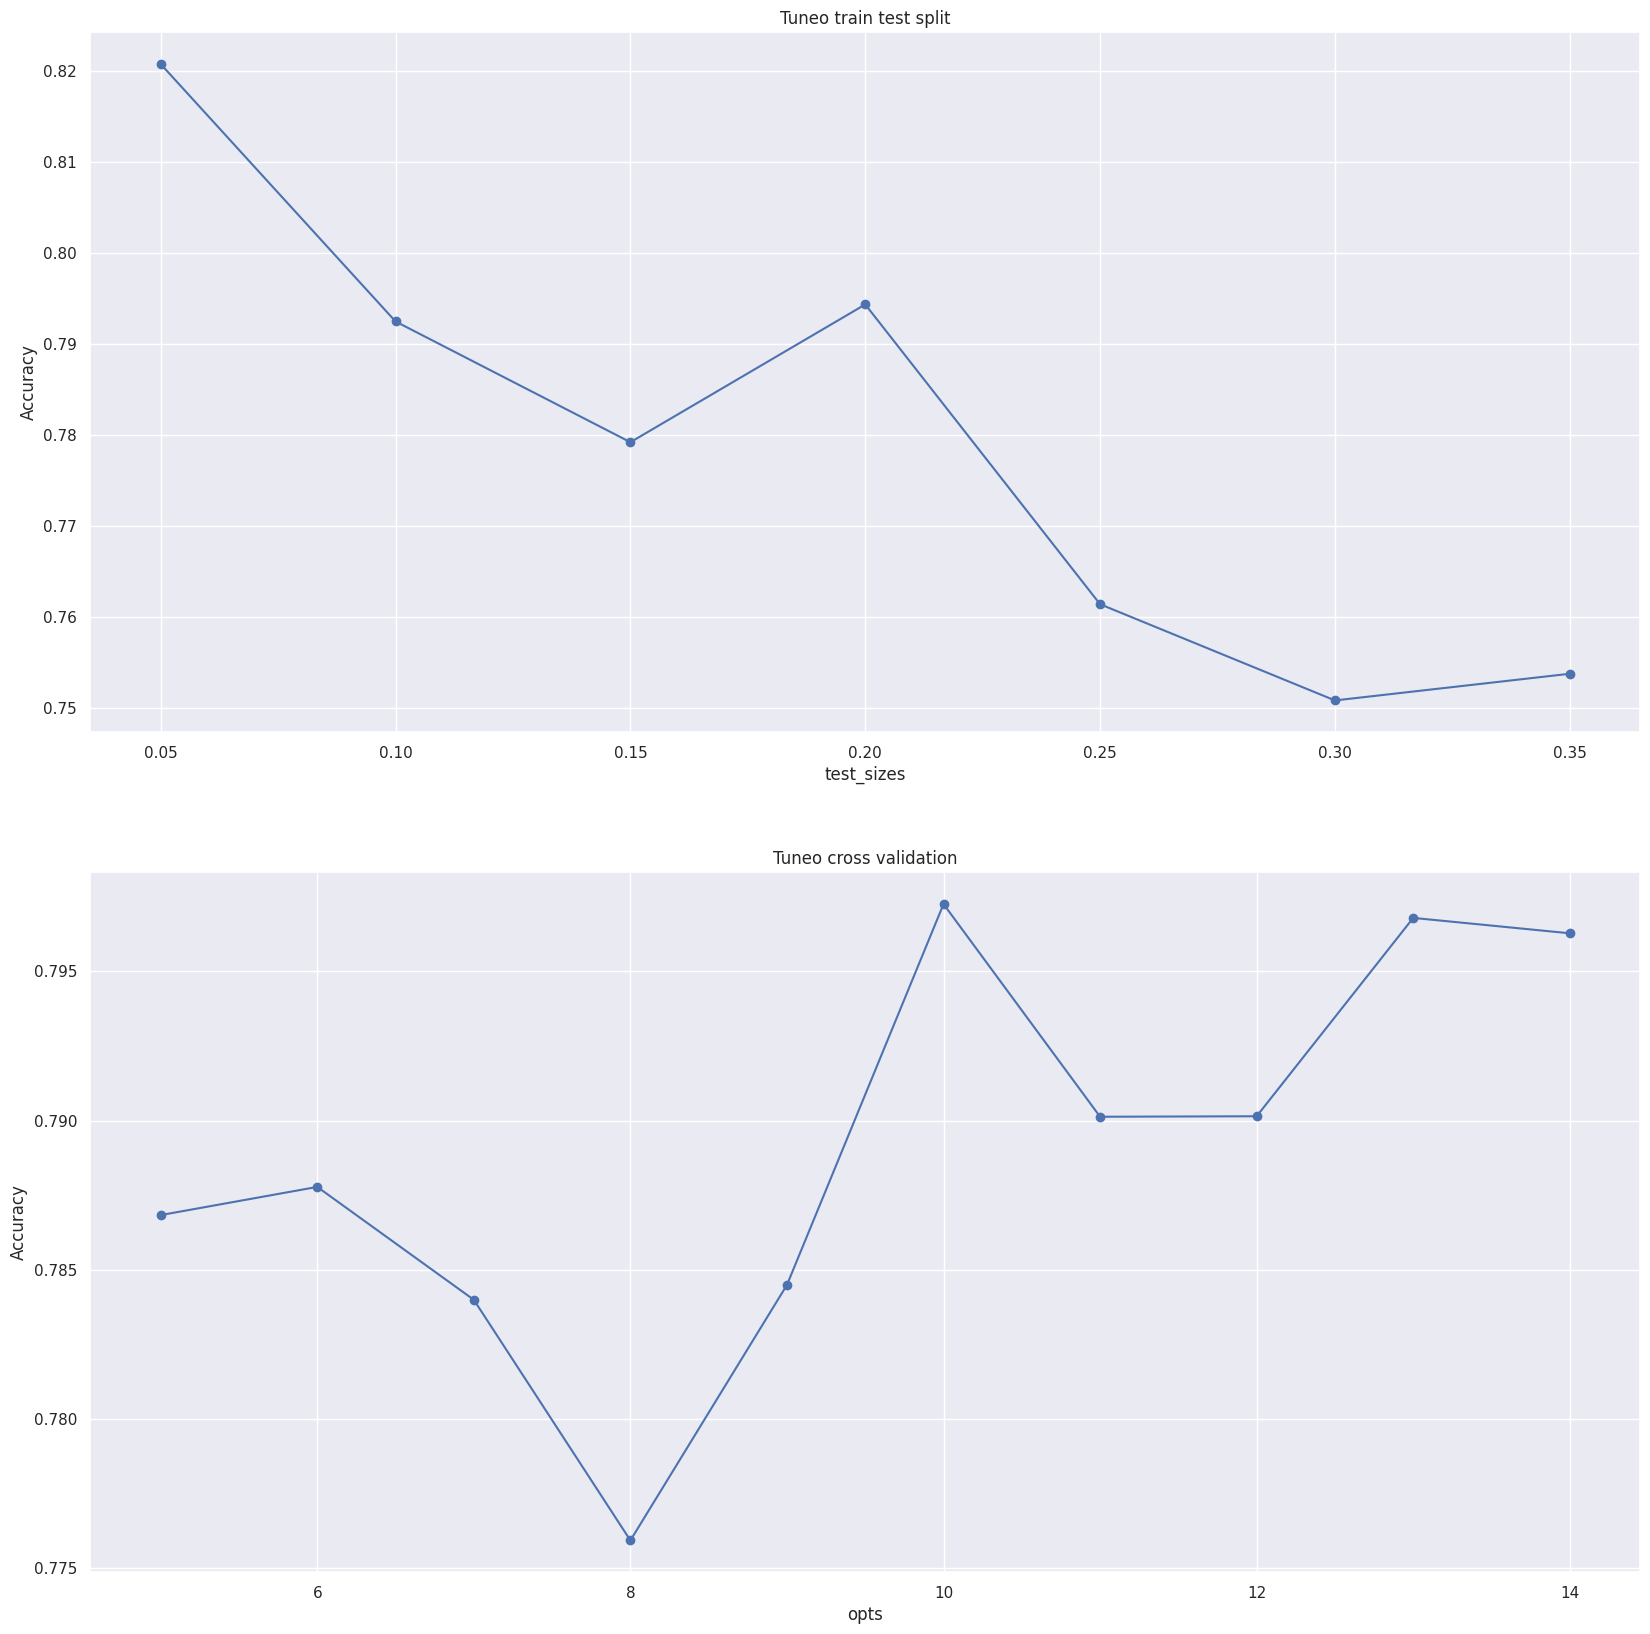

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

axes[0].set_title('Tuneo train test split')
axes[0].plot(test_sizes, accuracy_test_sizes, marker='o')
axes[0].set_xlabel('test_sizes')
axes[0].set_ylabel('Accuracy')
plt.grid(True)

axes[1].set_title('Tuneo cross validation')
axes[1].plot(opts, accuracy_opts, marker='o')
axes[1].set_xlabel('opts')
axes[1].set_ylabel('Accuracy')
plt.grid(True)

plt.show()

**Conclusiones:**

Se puede concluir que el mejor modelo Decision Tree se obtiene usando los parametros:

*   criterion:  entropy
*   max_depth:  14
*   Distribucion train/test: 95%/5%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=21)
model = DecisionTreeClassifier(max_depth = max_depth_value, criterion=max_criterion)
model.fit(X_train,y_train)
print('Accuracy: ',accuracy_score(model.predict(X_test), y_test))

Accuracy:  0.8301886792452831


**De acuerdo al tunning de n_folds para el cross validation se obtuvo como mejor valor: 10**

In [ ]:
max_n_folds = np.argmax(accuracy_opts)
max_n_folds = opts[max_n_folds]
print(max_n_folds)

10


In [ ]:
s = cross_val_score(est, X, y, cv=KFold(max_n_folds, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy de cross validation 0.803 (+/- 0.02804)


# **Random forest**

In [ ]:
est = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.8794326241134752


**Tunning de parámetros**

In [ ]:
n_estimators = np.arange(1, 200, step=20)
max_depth = np.arange(1, 20)
criterion = np.array(['entropy', 'log_loss', 'gini'])

In [ ]:
accuracy_n_estimators = []
accuracy_max_depth = []
accuracy_criterion = []

# Tunning de n_estimators usando las opciones del np array n_estimators
for i in n_estimators:
  est = RandomForestClassifier(n_estimators = i)
  est.fit(X_train,y_train)
  accuracy_n_estimators.append(accuracy_score(est.predict(X_test), y_test))

# Tunning de max_depth usando las opciones del np array max_depth
for j in max_depth:
  est = RandomForestClassifier(max_depth = j)
  est.fit(X_train,y_train)
  accuracy_max_depth.append(accuracy_score(est.predict(X_test), y_test))

# Tunning de criterion usando las opciones del np array criterion
for k in criterion:
  est = RandomForestClassifier(criterion = k)
  est.fit(X_train,y_train)
  accuracy_criterion.append(accuracy_score(est.predict(X_test), y_test))

**Graficando tunning de parametros**

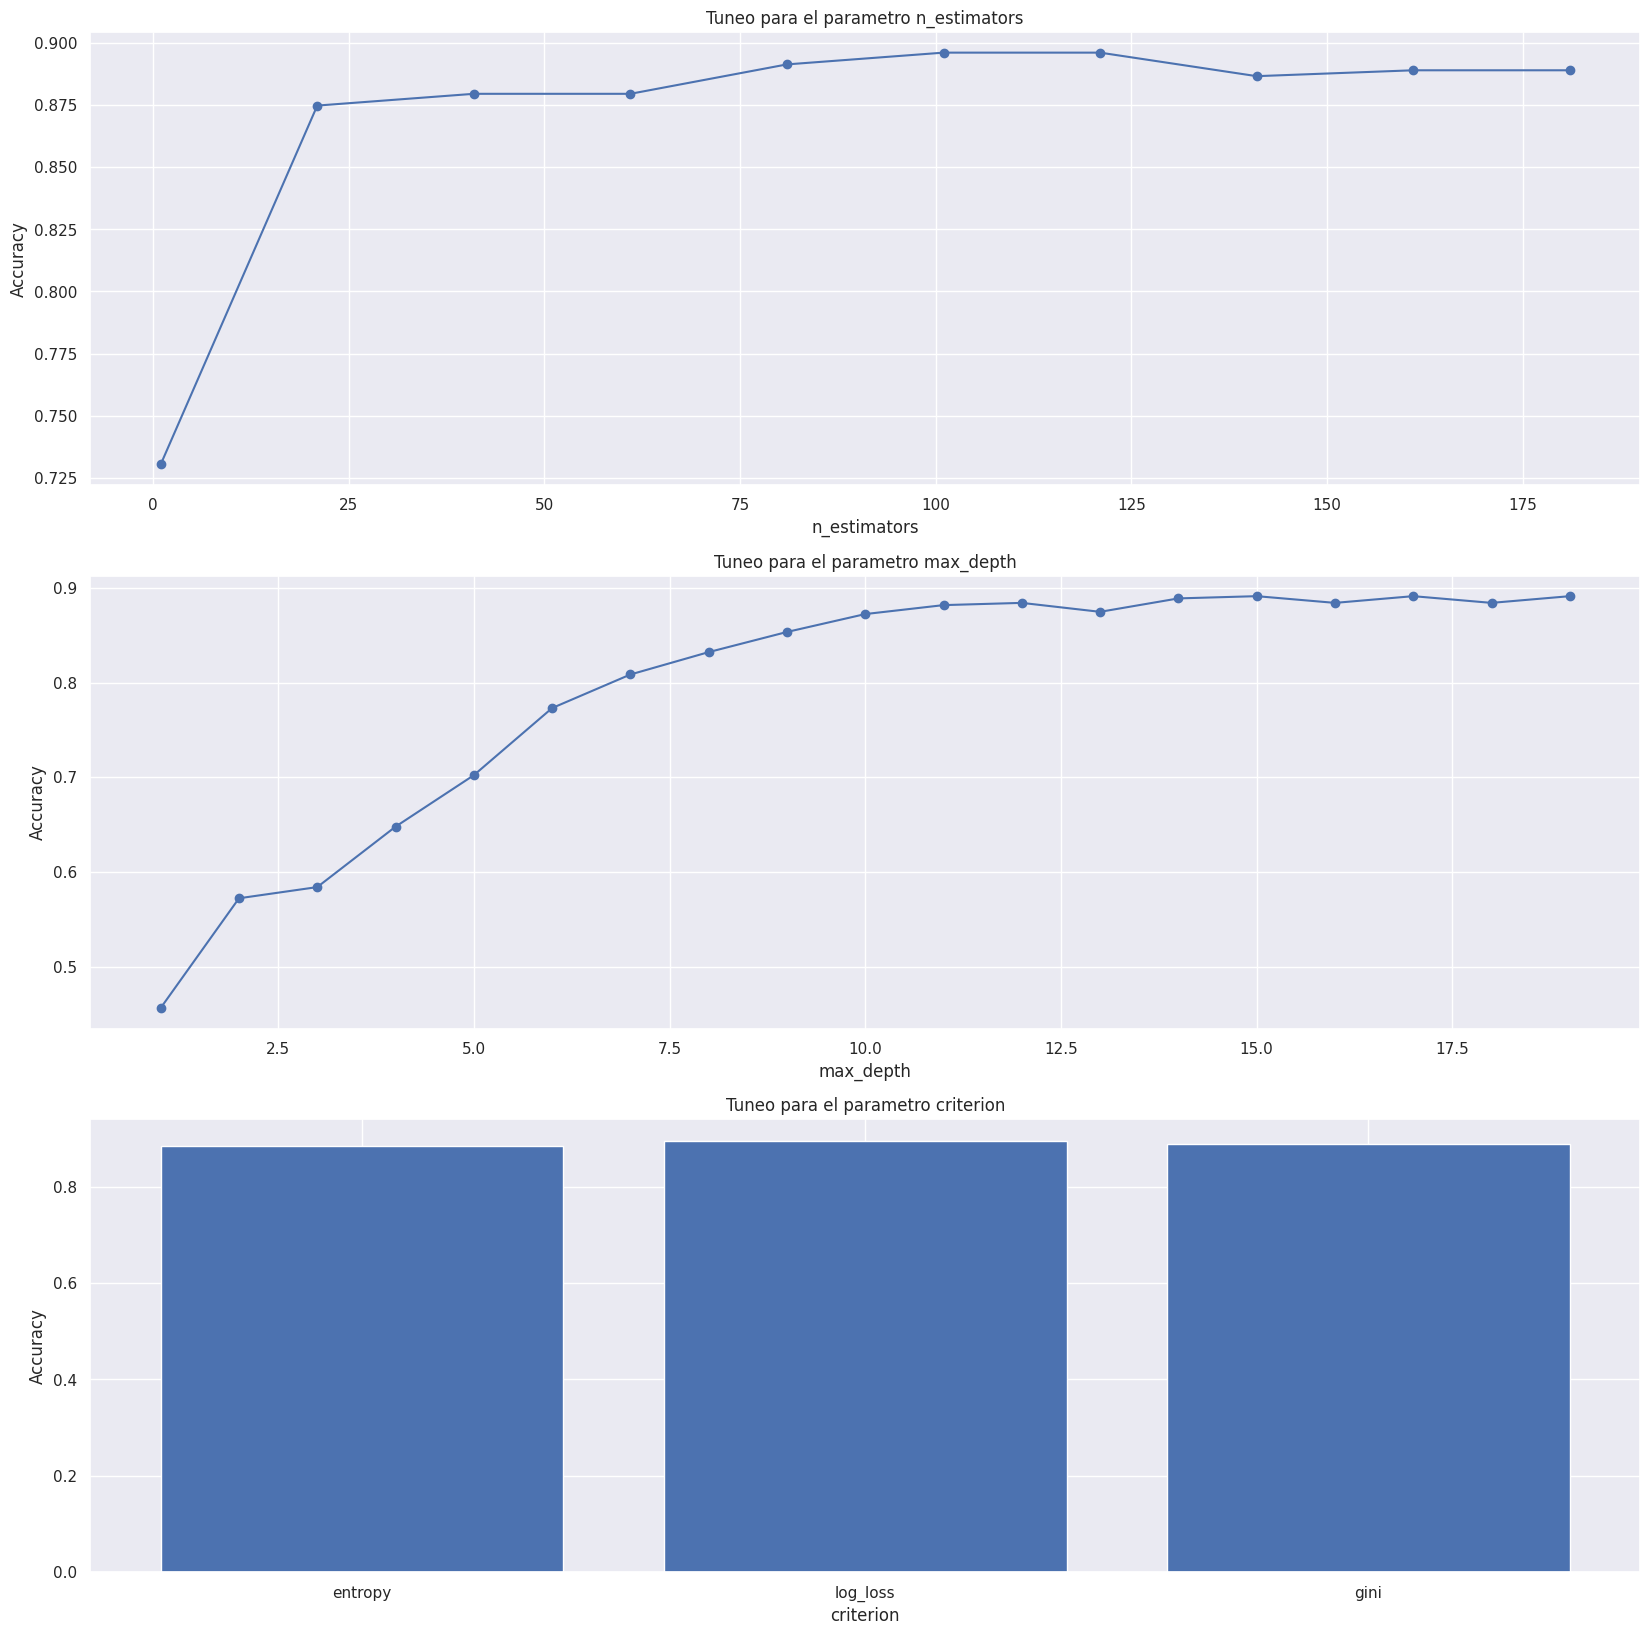

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

axes[0].set_title('Tuneo para el parametro n_estimators')
axes[0].plot(n_estimators, accuracy_n_estimators, marker='o')
axes[0].set_xlabel('n_estimators')
axes[0].set_ylabel('Accuracy')
plt.grid(True)

axes[1].set_title('Tuneo para el parametro max_depth')
axes[1].plot(max_depth, accuracy_max_depth, marker='o')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('Accuracy')
plt.grid(True)

axes[2].set_title('Tuneo para el parametro criterion')
axes[2].bar(criterion, accuracy_criterion)
axes[2].set_xlabel('criterion')
axes[2].set_ylabel('Accuracy')
plt.grid(True)
plt.show()

**Hallando valores mayores**

In [ ]:
max_n_estimators = np.argmax(accuracy_n_estimators)
max_n_estimators = n_estimators[max_n_estimators]
print('mejor n_estimators: ', max_n_estimators)


max_depth_value = np.argmax(accuracy_max_depth)
max_depth_value = max_depth[max_depth_value]
print('mejor max_depth: ', max_depth_value)

max_criterion = np.argmax(accuracy_criterion)
max_criterion = criterion[max_criterion]
print('valor de criterion para el accuracy maximo: ', max_criterion)

mejor n_estimators:  101
mejor max_depth:  15
valor de criterion para el accuracy maximo:  log_loss


**Entrenando con los valores maximos y train test split 80/20**

In [ ]:
est = RandomForestClassifier(n_estimators = max_n_estimators, max_depth = max_depth_value, criterion=max_criterion)
est.fit(X_train, y_train)
print('accuracy:', accuracy_score(est.predict(X_test), y_test))

accuracy: 0.8912529550827423


**Cross validation**

In [ ]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy de cross validation 0.889 (+/- 0.02161)


**Train test split tunning**

In [ ]:
test_sizes = np.arange(.05, .4, step=0.05)
accuracy_test_sizes = []
for i in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=21)
  est = RandomForestClassifier(n_estimators = max_n_estimators, max_depth = max_depth_value, criterion=max_criterion)
  est.fit(X_train,y_train)
  accuracy_test_sizes.append(accuracy_score(est.predict(X_test), y_test))

**Cross validation tunning**

In [ ]:
opts = np.arange(5, 15, step=1)
accuracy_opts = []
for j in opts:
  s = cross_val_score(est, X, y, cv=KFold(j, shuffle=True), scoring=make_scorer(accuracy_score))
  accuracy_opts.append(np.mean(s))

**Graficando tunnings**

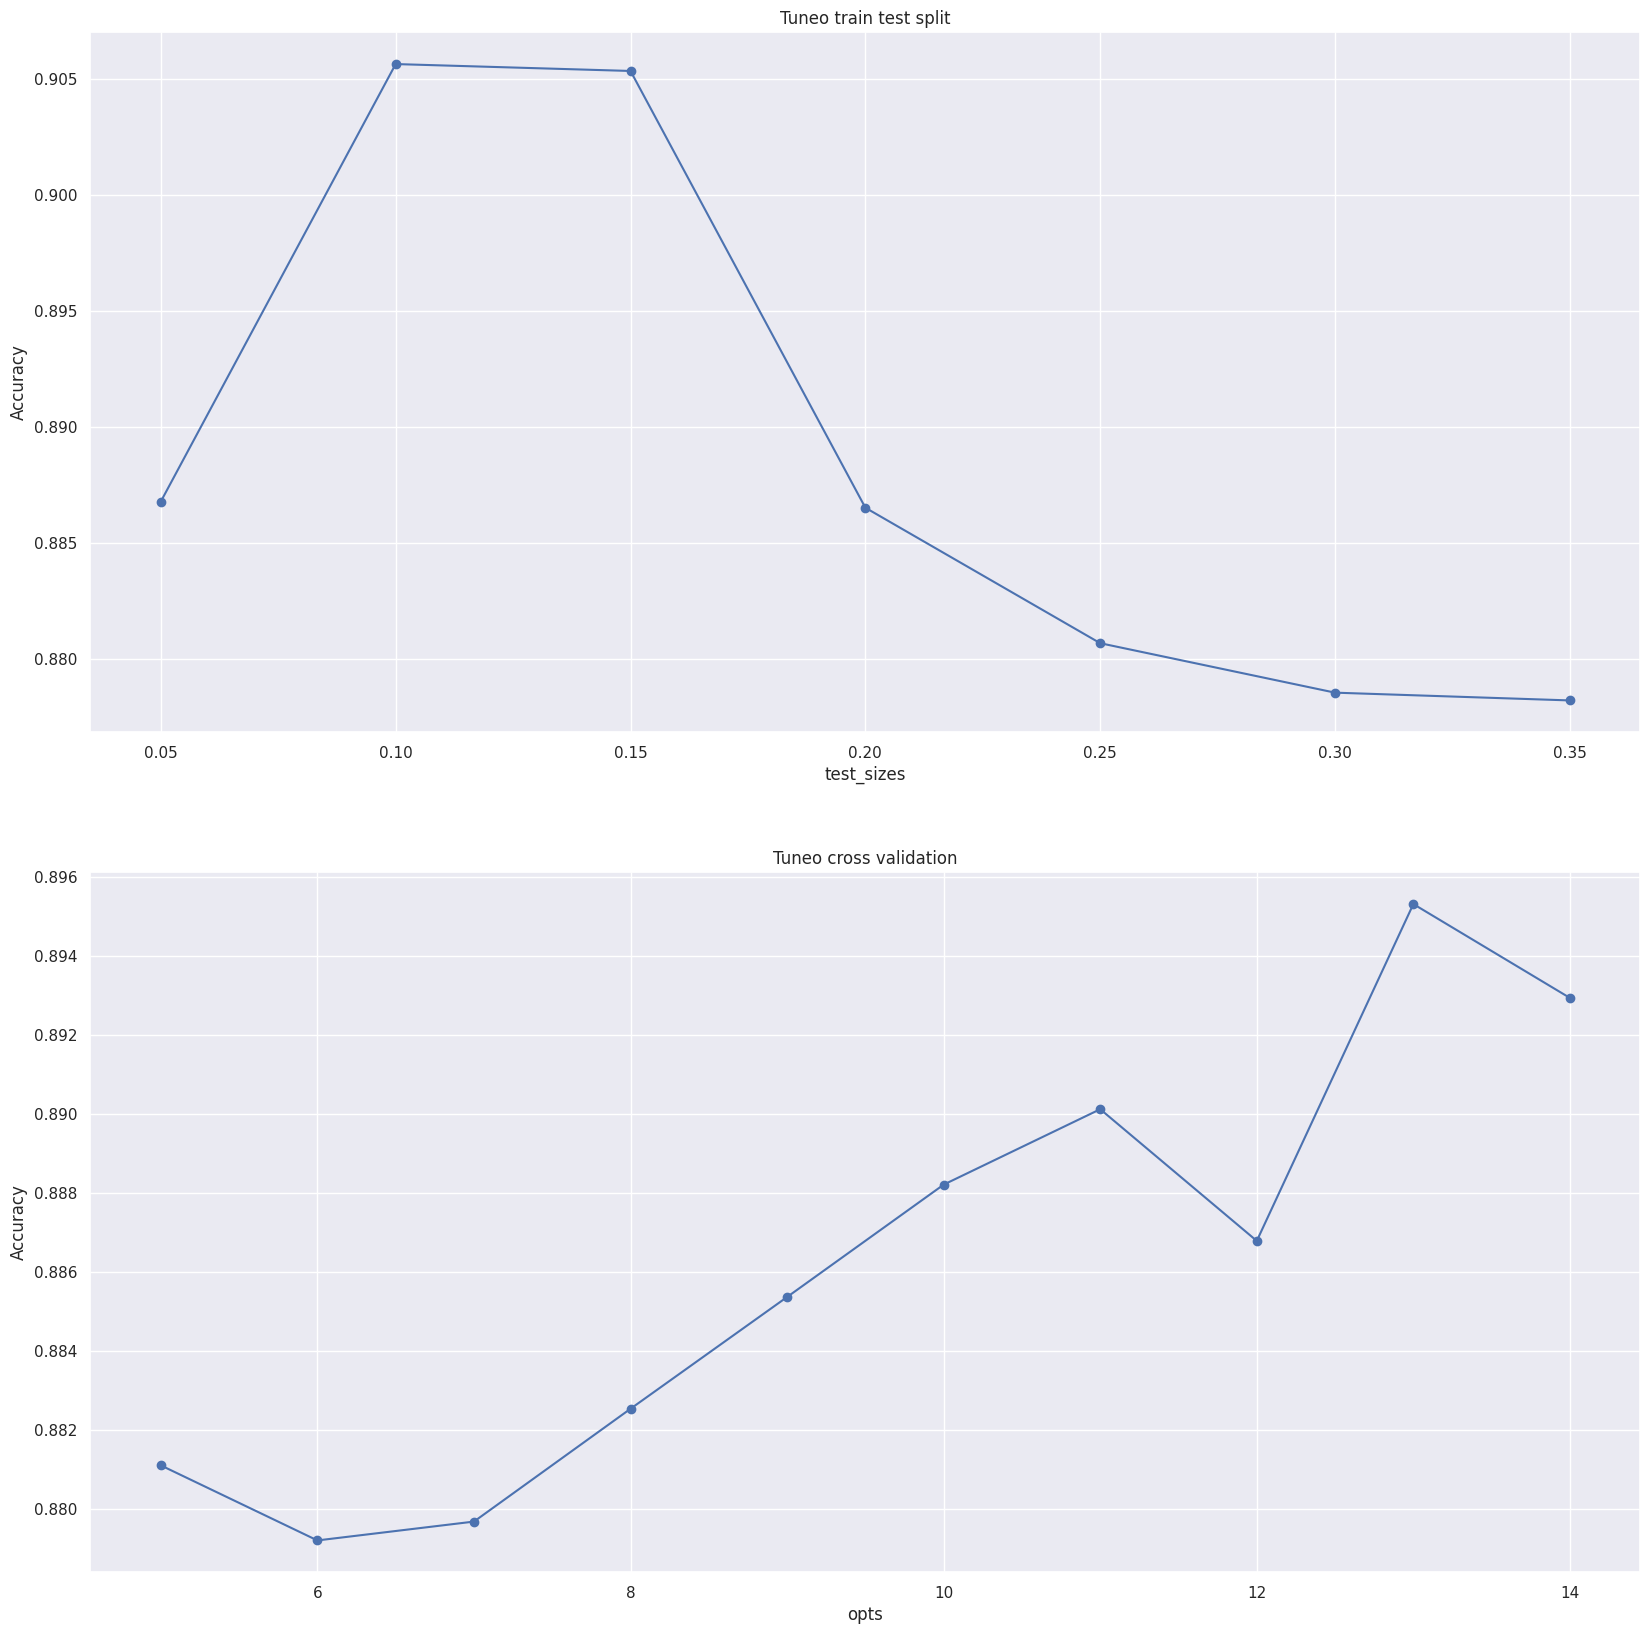

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

axes[0].set_title('Tuneo train test split')
axes[0].plot(test_sizes, accuracy_test_sizes, marker='o')
axes[0].set_xlabel('test_sizes')
axes[0].set_ylabel('Accuracy')
plt.grid(True)

axes[1].set_title('Tuneo cross validation')
axes[1].plot(opts, accuracy_opts, marker='o')
axes[1].set_xlabel('opts')
axes[1].set_ylabel('Accuracy')
plt.grid(True)

plt.show()

**Conclusiones**

Se puede concluir que el mejor modelo Random Forest se obtiene usando los parametros:

*   n_estimators:  141
*   criterion:  log_loss
*   max_depth:  18
*   Distribucion train/test: 85%/15%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=21)
est = RandomForestClassifier(n_estimators = max_n_estimators, max_depth = max_depth_value, criterion=max_criterion)
est.fit(X_train,y_train)
print('Accuracy: ',accuracy_score(est.predict(X_test), y_test))

Accuracy:  0.9053627760252366


**De acuerdo al tunning de n_folds para el cross validation se obtuvo como mejor valor: 13**

In [ ]:
max_n_folds = np.argmax(accuracy_opts)
max_n_folds = opts[max_n_folds]
print(max_n_folds)

13


In [ ]:
s = cross_val_score(est, X, y, cv=KFold(max_n_folds, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy de cross validation 0.889 (+/- 0.01577)


# Support Vector Machine (SVC)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est = SVC()
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.4657210401891253


**Tunning de parametros**

In [ ]:
Cs = np.arange(1, 40)
kernels = np.array([ 'linear', 'poly', 'rbf', 'sigmoid'])
accuracy_C = []
accuracy_kernel = []
for i in Cs:
  est = SVC(C=i)
  est.fit(X_train,y_train)
  accuracy_C.append(accuracy_score(est.predict(X_test), y_test))

for j in kernels:
  est = SVC(kernel=j)
  est.fit(X_train,y_train)
  accuracy_kernel.append(accuracy_score(est.predict(X_test), y_test))

**Graficando tunning de parametros**

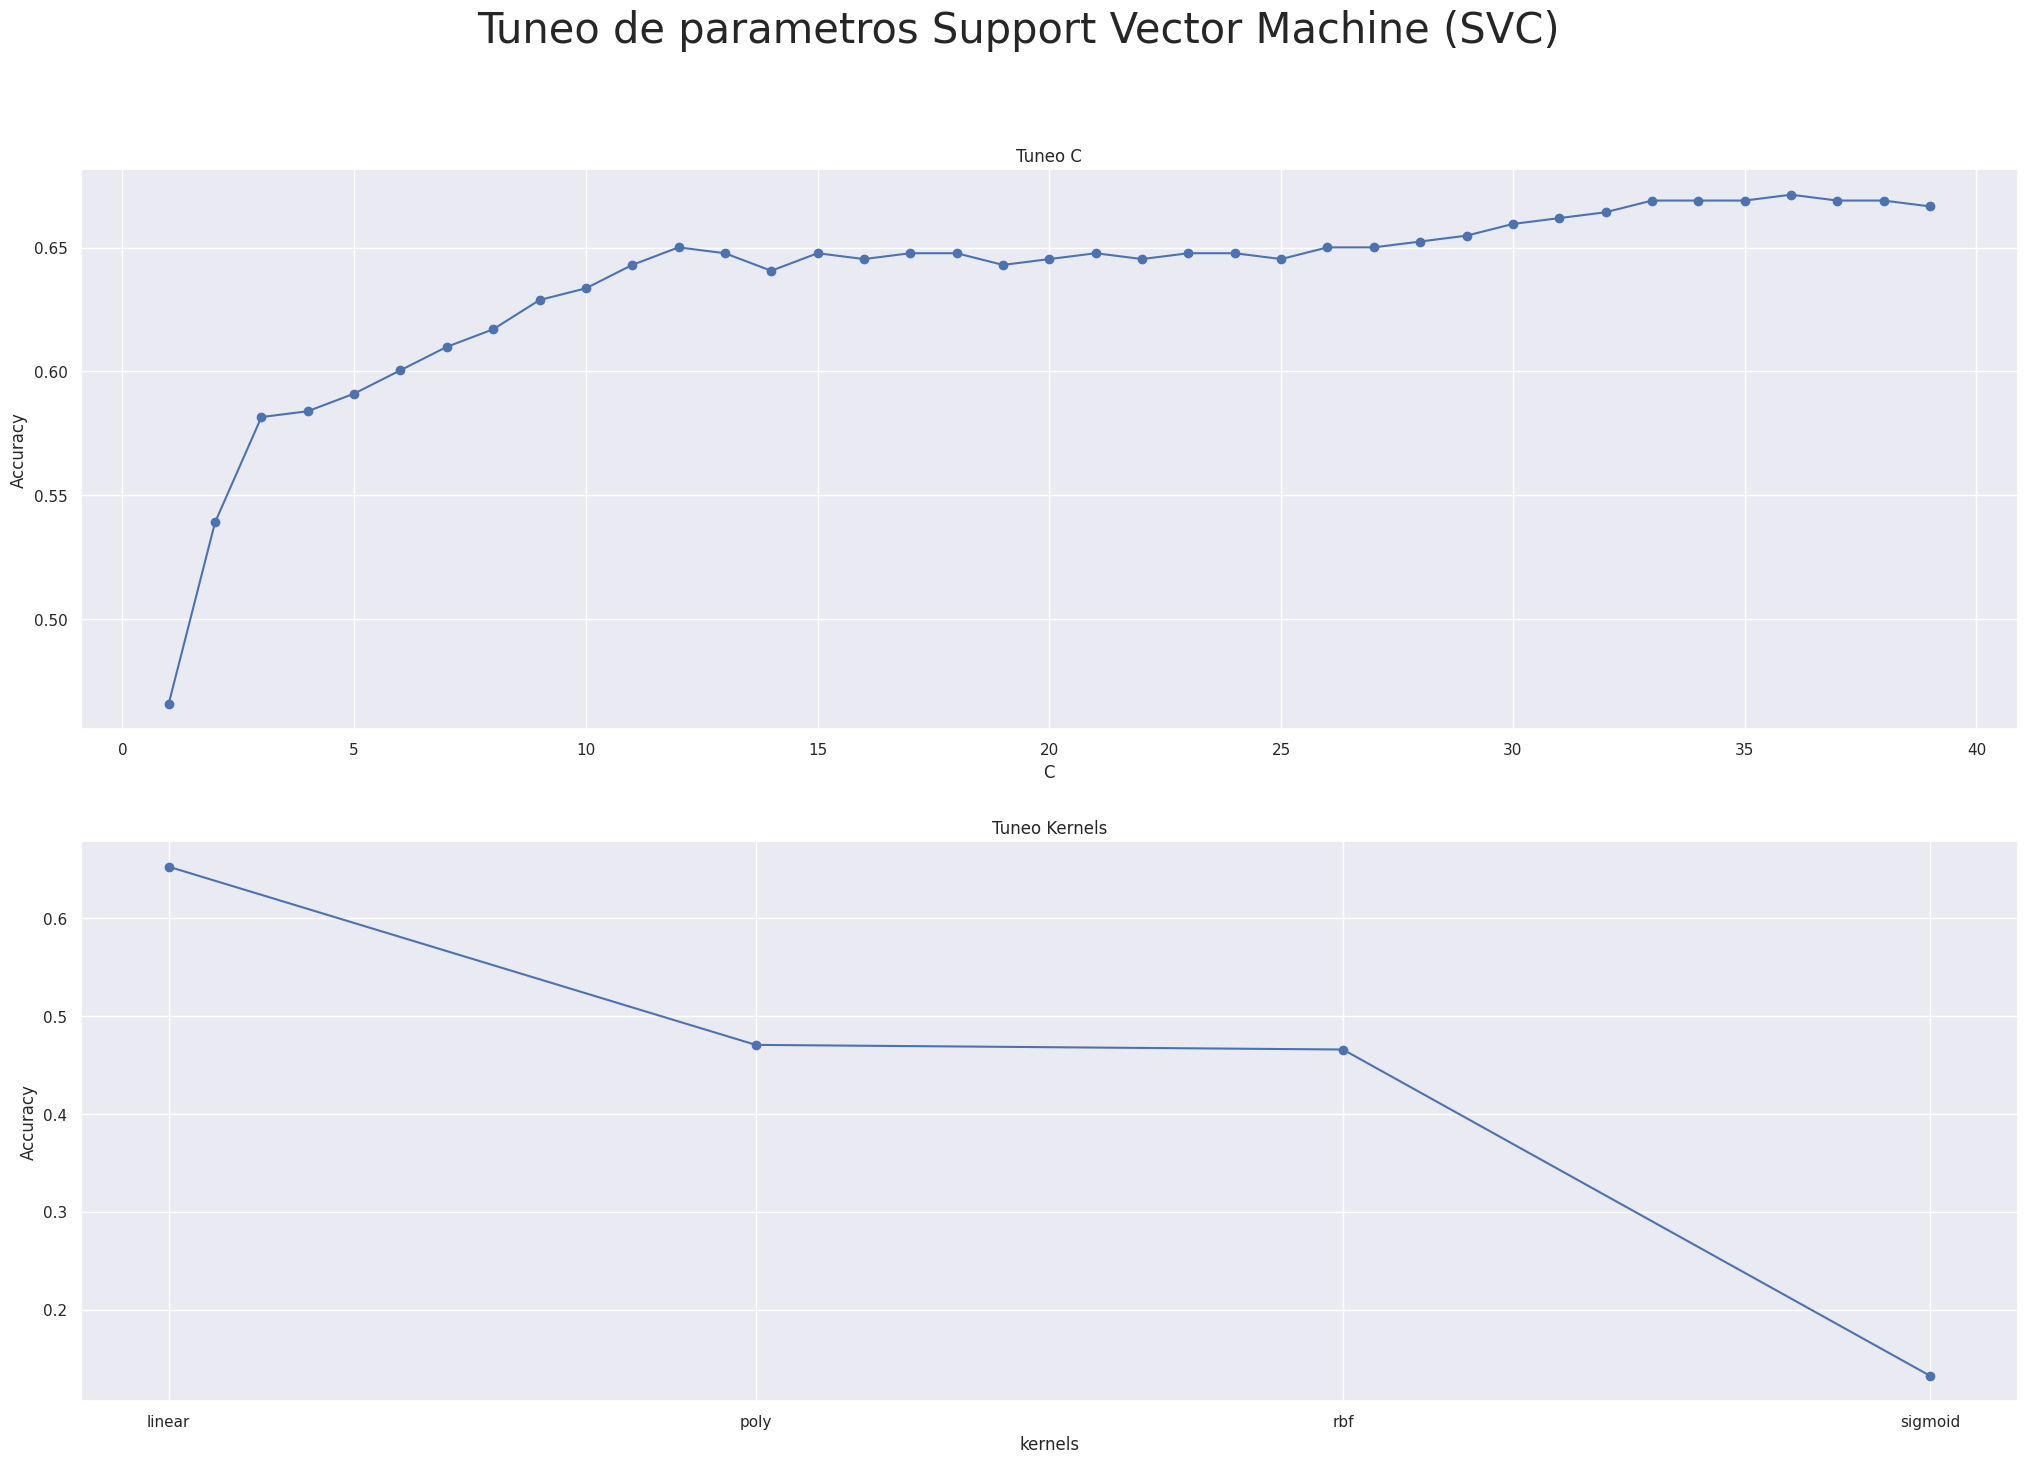

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 16))
fig.suptitle('Tuneo de parametros Support Vector Machine (SVC)', size=30)
axes[0].set_title('Tuneo C')
axes[0].plot(Cs, accuracy_C, marker='o')
axes[0].set_xlabel('C')
axes[0].set_ylabel('Accuracy')
plt.grid(True)

axes[1].set_title('Tuneo Kernels')
axes[1].plot(kernels, accuracy_kernel, marker='o')
axes[1].set_xlabel('kernels')
axes[1].set_ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
max_C = np.argmax(accuracy_C)
max_C = Cs[max_C]
print('mejor C: ', max_C)

max_kernel = np.argmax(accuracy_kernel)
max_kernel = kernels[max_kernel]
print('mejor kernel: ', max_kernel)

mejor C:  36
mejor kernel:  linear


**Entrenando con los valores maximos y train test split 80/20**

In [ ]:
est = SVC(C=max_C, kernel=max_kernel)
est.fit(X_train, y_train)
print('accuracy:', accuracy_score(est.predict(X_test), y_test))

accuracy: 0.6453900709219859


**Cross Validation**

In [ ]:
est = SVC(C=max_C, kernel=max_kernel)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy de cross validation 0.648 (+/- 0.04262)


**Train test split tunning**

In [ ]:
test_sizes_svc = np.arange(.05, .4, step=0.05)
accuracy_test_sizes_svc = []
for i in test_sizes_svc:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=21)
  est = SVC(C=max_C, kernel=max_kernel)
  est.fit(X_train,y_train)
  accuracy_test_sizes_svc.append(accuracy_score(est.predict(X_test), y_test))

**Cross validation tunning**

In [ ]:
est = SVC(C=max_C, kernel=max_kernel)
opts_svc = np.arange(8, 12)
accuracy_opts_svc = []
for j in opts_svc:
  s = cross_val_score(est, X, y, cv=KFold(j, shuffle=True), scoring=make_scorer(accuracy_score))
  accuracy_opts_svc.append(np.mean(s))

**Graficando**

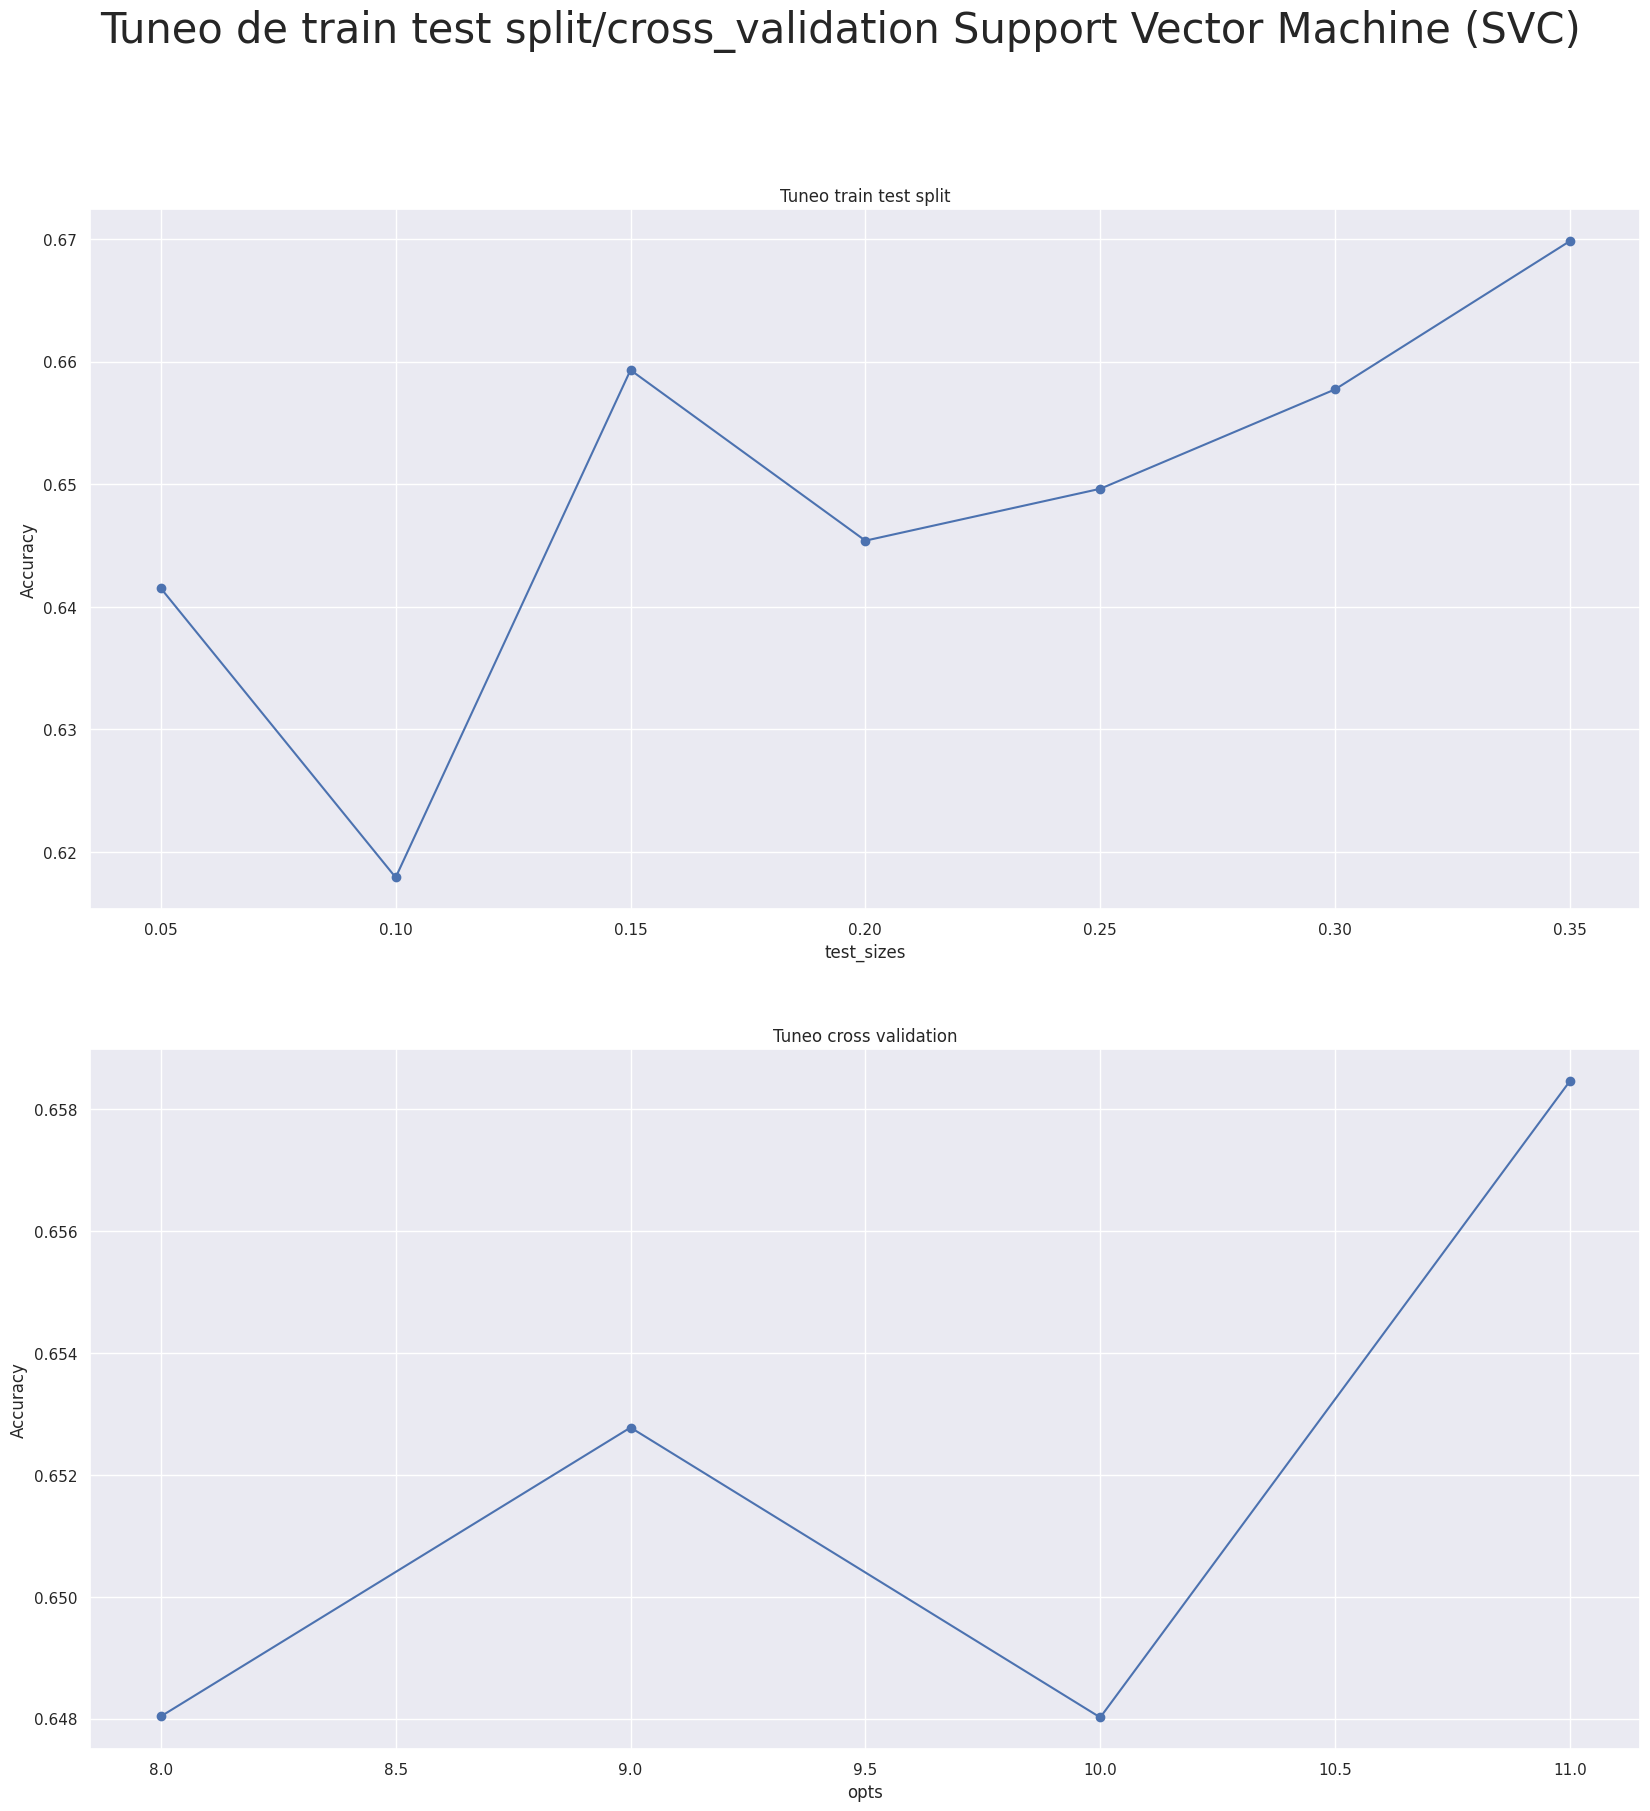

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
fig.suptitle('Tuneo de train test split/cross_validation Support Vector Machine (SVC)', size=30)
axes[0].set_title('Tuneo train test split')
axes[0].plot(test_sizes_svc, accuracy_test_sizes_svc, marker='o')
axes[0].set_xlabel('test_sizes')
axes[0].set_ylabel('Accuracy')
plt.grid(True)

axes[1].set_title('Tuneo cross validation')
axes[1].plot(opts_svc, accuracy_opts_svc, marker='o')
axes[1].set_xlabel('opts')
axes[1].set_ylabel('Accuracy')
plt.grid(True)

plt.show()

**Conclusiones:**

Se puede concluir que el mejor modelo de maquina de soporte vectorial se obtiene usando los parametros:

*   C:  36
*   Kernel:  linear
*   Distribucion train/test: 65%/35%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=21)
est = SVC(C=max_C, kernel=max_kernel)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.6698240866035182


**De acuerdo al tunning de n_folds para el cross validation se obtuvo como mejor valor: 11**

In [ ]:
max_n_folds_svc = np.argmax(accuracy_opts_svc)
max_n_folds_svc = opts_svc[max_n_folds_svc]
print(max_n_folds_svc)

11


In [ ]:
est = SVC(C=max_C, kernel=max_kernel)
s = cross_val_score(est, X, y, cv=KFold(max_n_folds_svc, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy de cross validation 0.655 (+/- 0.03229)


# Deep Learning (DL)

**Implementación de red neuronal.**

Inicialmente se realiza **one-hot-encoding** al ground truth Y ('NObeyesdad'), ya que esta variable tiene valores categoricos.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=7)

Se utiliza un bloque secuencial de codigo para implementar una red neuronal con las siguientes caracteristicas:

- 1 capa intermedia 'hidden' con 1024 neuronas, función de activación -> `tanh`
- 1 capa intermedia 'hidden' con 1024 neuronas, función de activación -> `tanh`
- 1 capa intermedia 'hidden' con 1024 neuronas, función de activación -> `tanh`
- 1 capa intermedia 'hidden' con 64 neuronas, función de activación -> `tanh`
- 1 capa de salida con 7 neuronas (numero de clases, debido a que se busca clasificar segun el numero de clases), función de activación -> `softmax`

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=X_train[0].shape),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

Se compila el modelo con los siguientes parametros:

- Optimizador de gradiente descendiente (SGD)
- loss = 'categorical_crossentropy'
- metrica = 'accuracy'

Se entrena el modelo con los siguientes parametros:

- epochs = 15
- batch_size = 10

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_ohe, epochs=15, batch_size=10)

test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

Epoch 1/15
169/169 [==============================] - 6s 31ms/step - loss: 1.9356 - accuracy: 0.1712
Epoch 2/15
169/169 [==============================] - 4s 24ms/step - loss: 1.8331 - accuracy: 0.2411
Epoch 3/15
169/169 [==============================] - 3s 20ms/step - loss: 1.7695 - accuracy: 0.2547
Epoch 4/15
169/169 [==============================] - 3s 20ms/step - loss: 1.7197 - accuracy: 0.2927
Epoch 5/15
169/169 [==============================] - 4s 26ms/step - loss: 1.6622 - accuracy: 0.3300
Epoch 6/15
169/169 [==============================] - 5s 28ms/step - loss: 1.6071 - accuracy: 0.3584
Epoch 7/15
169/169 [==============================] - 3s 20ms/step - loss: 1.5883 - accuracy: 0.3685
Epoch 8/15
169/169 [==============================] - 3s 20ms/step - loss: 1.5361 - accuracy: 0.3874
Epoch 9/15
169/169 [==============================] - 4s 22ms/step - loss: 1.5384 - accuracy: 0.3904
Epoch 10/15
169/169 [==============================] - 5s 30ms/step - loss: 1.4793 - accura

Se obtiene un accuracy del 57.4%

In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.5744680762290955


# PCA



Estandarice los datos según las características

In [ ]:
mean = np.mean(df)
std = np.std(df)
print("mean:", mean)
print("std:", std)

standardized_data = (df - mean) / std

mean: Gender                             0.505921
Age                               24.312600
Height                             1.701677
family_history_with_overweight     0.817622
FAVC                               0.883941
FCVC                               2.419043
NCP                                2.685628
CAEC                               1.140692
SMOKE                              0.020843
CH2O                               2.008011
SCC                                0.045476
FAF                                1.010298
TUE                                0.657866
CALC                               0.731407
MTRANS                             2.365230
NObeyesdad                         3.112269
dtype: float64
std: Gender                            0.499965
Age                               6.344465
Height                            0.093283
family_history_with_overweight    0.386156
FAVC                              0.320295
FCVC                              0.533800
NCP         

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Así se vería luego de estandarizar el dataset:

In [ ]:
standardized_data

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,0.503337,-1.064334
1,-1.011914,-0.522124,-1.947599,0.472291,-2.759769,1.088342,0.404153,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,0.503337,-1.064334
2,0.988227,-0.206889,1.054029,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,0.503337,-1.064334
3,0.988227,0.423582,1.054029,-2.117337,-2.759769,1.088342,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,1.296280,-0.560452
4,0.988227,-0.364507,0.839627,-2.117337,-2.759769,-0.785019,-2.167023,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,0.503337,-0.056570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-1.011914,-0.525774,0.097045,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,-0.456705,-0.218272,0.783135,0.407996,0.521160,0.503337,1.455076
2107,-1.011914,-0.367195,0.502844,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,-0.004702,-0.218272,0.389341,-0.096251,0.521160,0.503337,1.455076
2108,-1.011914,-0.281909,0.541672,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,0.075361,-0.218272,0.474971,-0.019018,0.521160,0.503337,1.455076
2109,-1.011914,0.007776,0.404927,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,1.377801,-0.218272,0.151471,-0.117991,0.521160,0.503337,1.455076


Calcular la matriz de covarianza

In [ ]:
covariance_matrix = np.cov(standardized_data, rowvar = False)
covariance_matrix

array([[ 1.00047393,  0.04841713,  0.61875941,  0.10256072,  0.06496455,
        -0.27463488,  0.06763203, -0.09158673,  0.04471927,  0.10798083,
        -0.10268212,  0.18969682,  0.01727766, -0.00761948, -0.13760248,
        -0.03147853],
       [ 0.04841713,  1.00047393, -0.02597044,  0.20582283,  0.06393197,
         0.01629861, -0.04396455, -0.08377838,  0.09203104, -0.04532533,
        -0.11633796, -0.14500702, -0.29707132,  0.04450819, -0.60223047,
         0.28304749],
       [ 0.61875941, -0.02597044,  1.00047393,  0.24780128,  0.17844831,
        -0.03813913,  0.24378721, -0.04884133,  0.05552569,  0.21347704,
        -0.13381617,  0.29484867,  0.05193627,  0.12979335, -0.0736441 ,
         0.13362786],
       [ 0.10256072,  0.20582283,  0.24780128,  1.00047393,  0.2081341 ,
         0.04039138,  0.07140352, -0.169867  ,  0.01739374,  0.14750648,
        -0.18550958, -0.05670006,  0.02295417, -0.03669329, -0.10158781,
         0.50538782],
       [ 0.06496455,  0.06393197,  0

Eigendecomposition en la matriz de covarianza

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("eigenvalues", eigenvalues)

print("eigenvectors", eigenvectors)

eigenvalues [2.42976942 1.96185099 1.59478605 0.26243384 0.29335503 1.34237204
 0.42142151 0.60459418 1.12521565 1.06782848 0.98981978 0.68104398
 0.86243571 0.7599707  0.78735911 0.82332646]
eigenvectors [[-0.26597326 -0.44189681  0.25876954 -0.40192671 -0.45900511  0.15379423
   0.10433277 -0.28995289  0.02316562 -0.17231388  0.0272379   0.14684006
   0.19134368 -0.1396319  -0.25809957  0.03041099]
 [-0.32205478  0.3408684   0.42978782  0.48379194 -0.35009939 -0.0982301
   0.42272986  0.0231489   0.00458406  0.02829783  0.05855748  0.10397625
  -0.11707102 -0.06320956  0.13030256  0.01097463]
 [-0.34746648 -0.47872965  0.04468197  0.51595333  0.49642375 -0.09403092
  -0.06083872 -0.11822339 -0.09775865 -0.01109694 -0.04269529  0.11813722
   0.15220675 -0.08399292 -0.17416154  0.15136393]
 [-0.42038119  0.0429986  -0.18487866  0.03457496 -0.23961628  0.01572265
  -0.4998044   0.4086445   0.02210946  0.28637208  0.32244672  0.05505496
  -0.09551273 -0.23305506 -0.19130697 -0.14852901]


Ordenar los componentes principales

In [ ]:
order_of_importance = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns

Calcular la varianza explicada

In [ ]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

Reduce el dataset usando los componentes principales

In [ ]:
k = 14
reduced_data = np.matmul(standardized_data, sorted_eigenvectors[:,:k])

print(reduced_data)

            0         1         2         3         4         5         6   \
0     1.940447  0.435643 -0.002771  0.624197  0.783315  0.820019  1.039461   
1     2.773239 -0.307401  0.796276 -5.604333 -0.340371 -3.083537  5.636287   
2     0.229255 -2.190146  0.501464 -0.891921 -0.250106 -1.391118 -0.428908   
3     0.914560 -1.328438  0.577941 -2.492179  0.123011 -1.989495 -1.461328   
4     1.251914 -0.056926  0.958996  0.443378  0.999570 -2.636017 -0.187654   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.494474  0.323176 -1.759035 -0.790616 -0.309770  0.657591 -0.061219   
2107 -0.826577  0.385391 -1.675150 -1.013361 -0.167763  0.447266 -0.223297   
2108 -0.871195  0.323788 -1.664553 -1.047356 -0.133578  0.455899 -0.194043   
2109 -1.160582  0.385458 -1.822563 -1.372295  0.314119  0.161243 -0.220315   
2110 -1.108068  0.350519 -1.942607 -1.273789  0.231259  0.169960 -0.186676   

            7         8         9         10        11        1

Determinar la varianza explicada

In [ ]:
total_explained_variance = sum(explained_variance[:k])

print(explained_variance)

print("total_explained_variance (k=14):", total_explained_variance)

[0.15178865 0.1225576  0.09962691 0.08385851 0.07029266 0.06670767
 0.06183443 0.0538767  0.05143353 0.04918663 0.04747567 0.04254509
 0.03776924 0.02632637 0.018326   0.01639434]
total_explained_variance (k=14): 0.9652796507303126


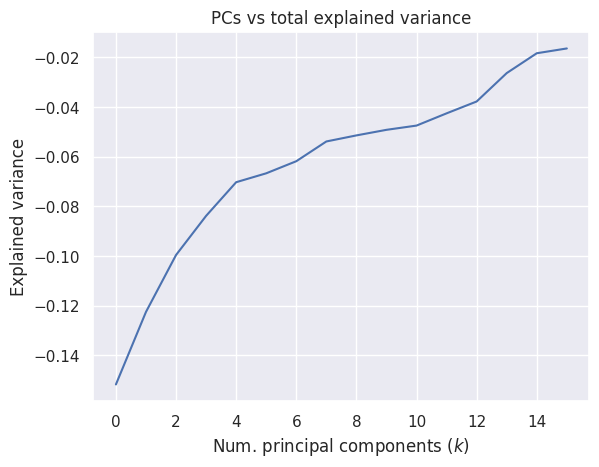

In [ ]:
plt.plot(-1*explained_variance)
plt.title("PCs vs total explained variance")
plt.xlabel("Num. principal components ($k$)")
plt.ylabel("Explained variance")
plt.show()

PCs vs Varianza total explicada

Se escoge k = 14 como el numero de componentes ideal ya que si bien k = 15 nos genera una varianza explicada mayor, el crecimiento de este valor respecto a la varianza explicada de k = 14 es muy poco.

In [ ]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=14)
X_pca = mypca.fit_transform(standardized_data)

<ipython-input-20-9d802de55cd3>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow")


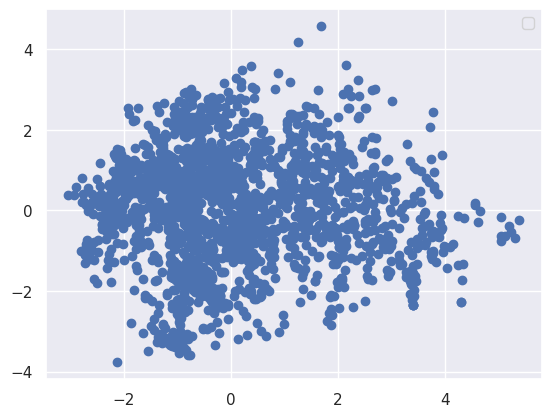

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow")
plt.legend()
plt.show()